# Text Mining 

In [1]:
# Perform sentimental analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
data = pd.read_csv('Elon_musk.csv', encoding = 'iso-8859-1')
data

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

## Text Preprocessing

In [4]:
data=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [5]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
#Punctuation
no_punc_text = data_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [7]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [8]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil'

In [10]:
# Tokens count
len(text_tokens)

20423

In [11]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

In [12]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001

In [13]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [14]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [15]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true'

In [16]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasona

## Feature Extaction
### 1. Using CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [18]:
print(vectorizer.vocabulary_)

{'kunalb11': 2039, 'alien': 229, 'idaacarmack': 1779, 'ray': 2944, 'trace': 3810, 'cyberpunk': 960, 'hdr': 1667, 'nextlevel': 2487, 'have': 1661, 'try': 3845, 'joerogan': 1960, 'spotify': 3436, 'great': 1600, 'interview': 1889, 'gtera27': 1618, 'doge': 1111, 'underestimate': 3975, 'teslacn': 3656, 'congratulation': 853, 'tesla': 3650, 'china': 738, 'amazing': 255, 'execution': 1322, 'last': 2056, 'year': 4246, 'now': 2526, 'next': 2486, 'even': 1293, 'happy': 1648, 'new': 2483, 'ox': 2644, 'frodo': 1486, 'underdoge': 3974, 'all': 232, 'thought': 3734, 'would': 4221, 'fail': 1358, 'himself': 1713, 'owenspark': 2640, 'flcnhvy': 1428, 'anonyx10': 284, 'haha': 1633, 'thanks': 3693, 'indeed': 1828, 'tweet': 3864, 'definitely': 1014, 'represent': 3026, 'realworld': 2969, 'time': 3752, 'allocation': 234, 'the': 3700, 'entertaining': 1250, 'outcome': 2620, 'likely': 2117, 'givedirectly': 1570, 'just': 1987, 'send': 3210, 'agree': 200, 'clubhouse': 779, 'kanyewest': 1996, 'geoffkeighley': 1550,

In [19]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
print(X.toarray().shape)

(15123, 4278)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [21]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [22]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'ye

## 3. TF-IDF Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [24]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'cyberpunkgame', 'datum', 'day', 'definitely', 'design', 'detail', 'didn', 'differenc

## Generate Word Cloud

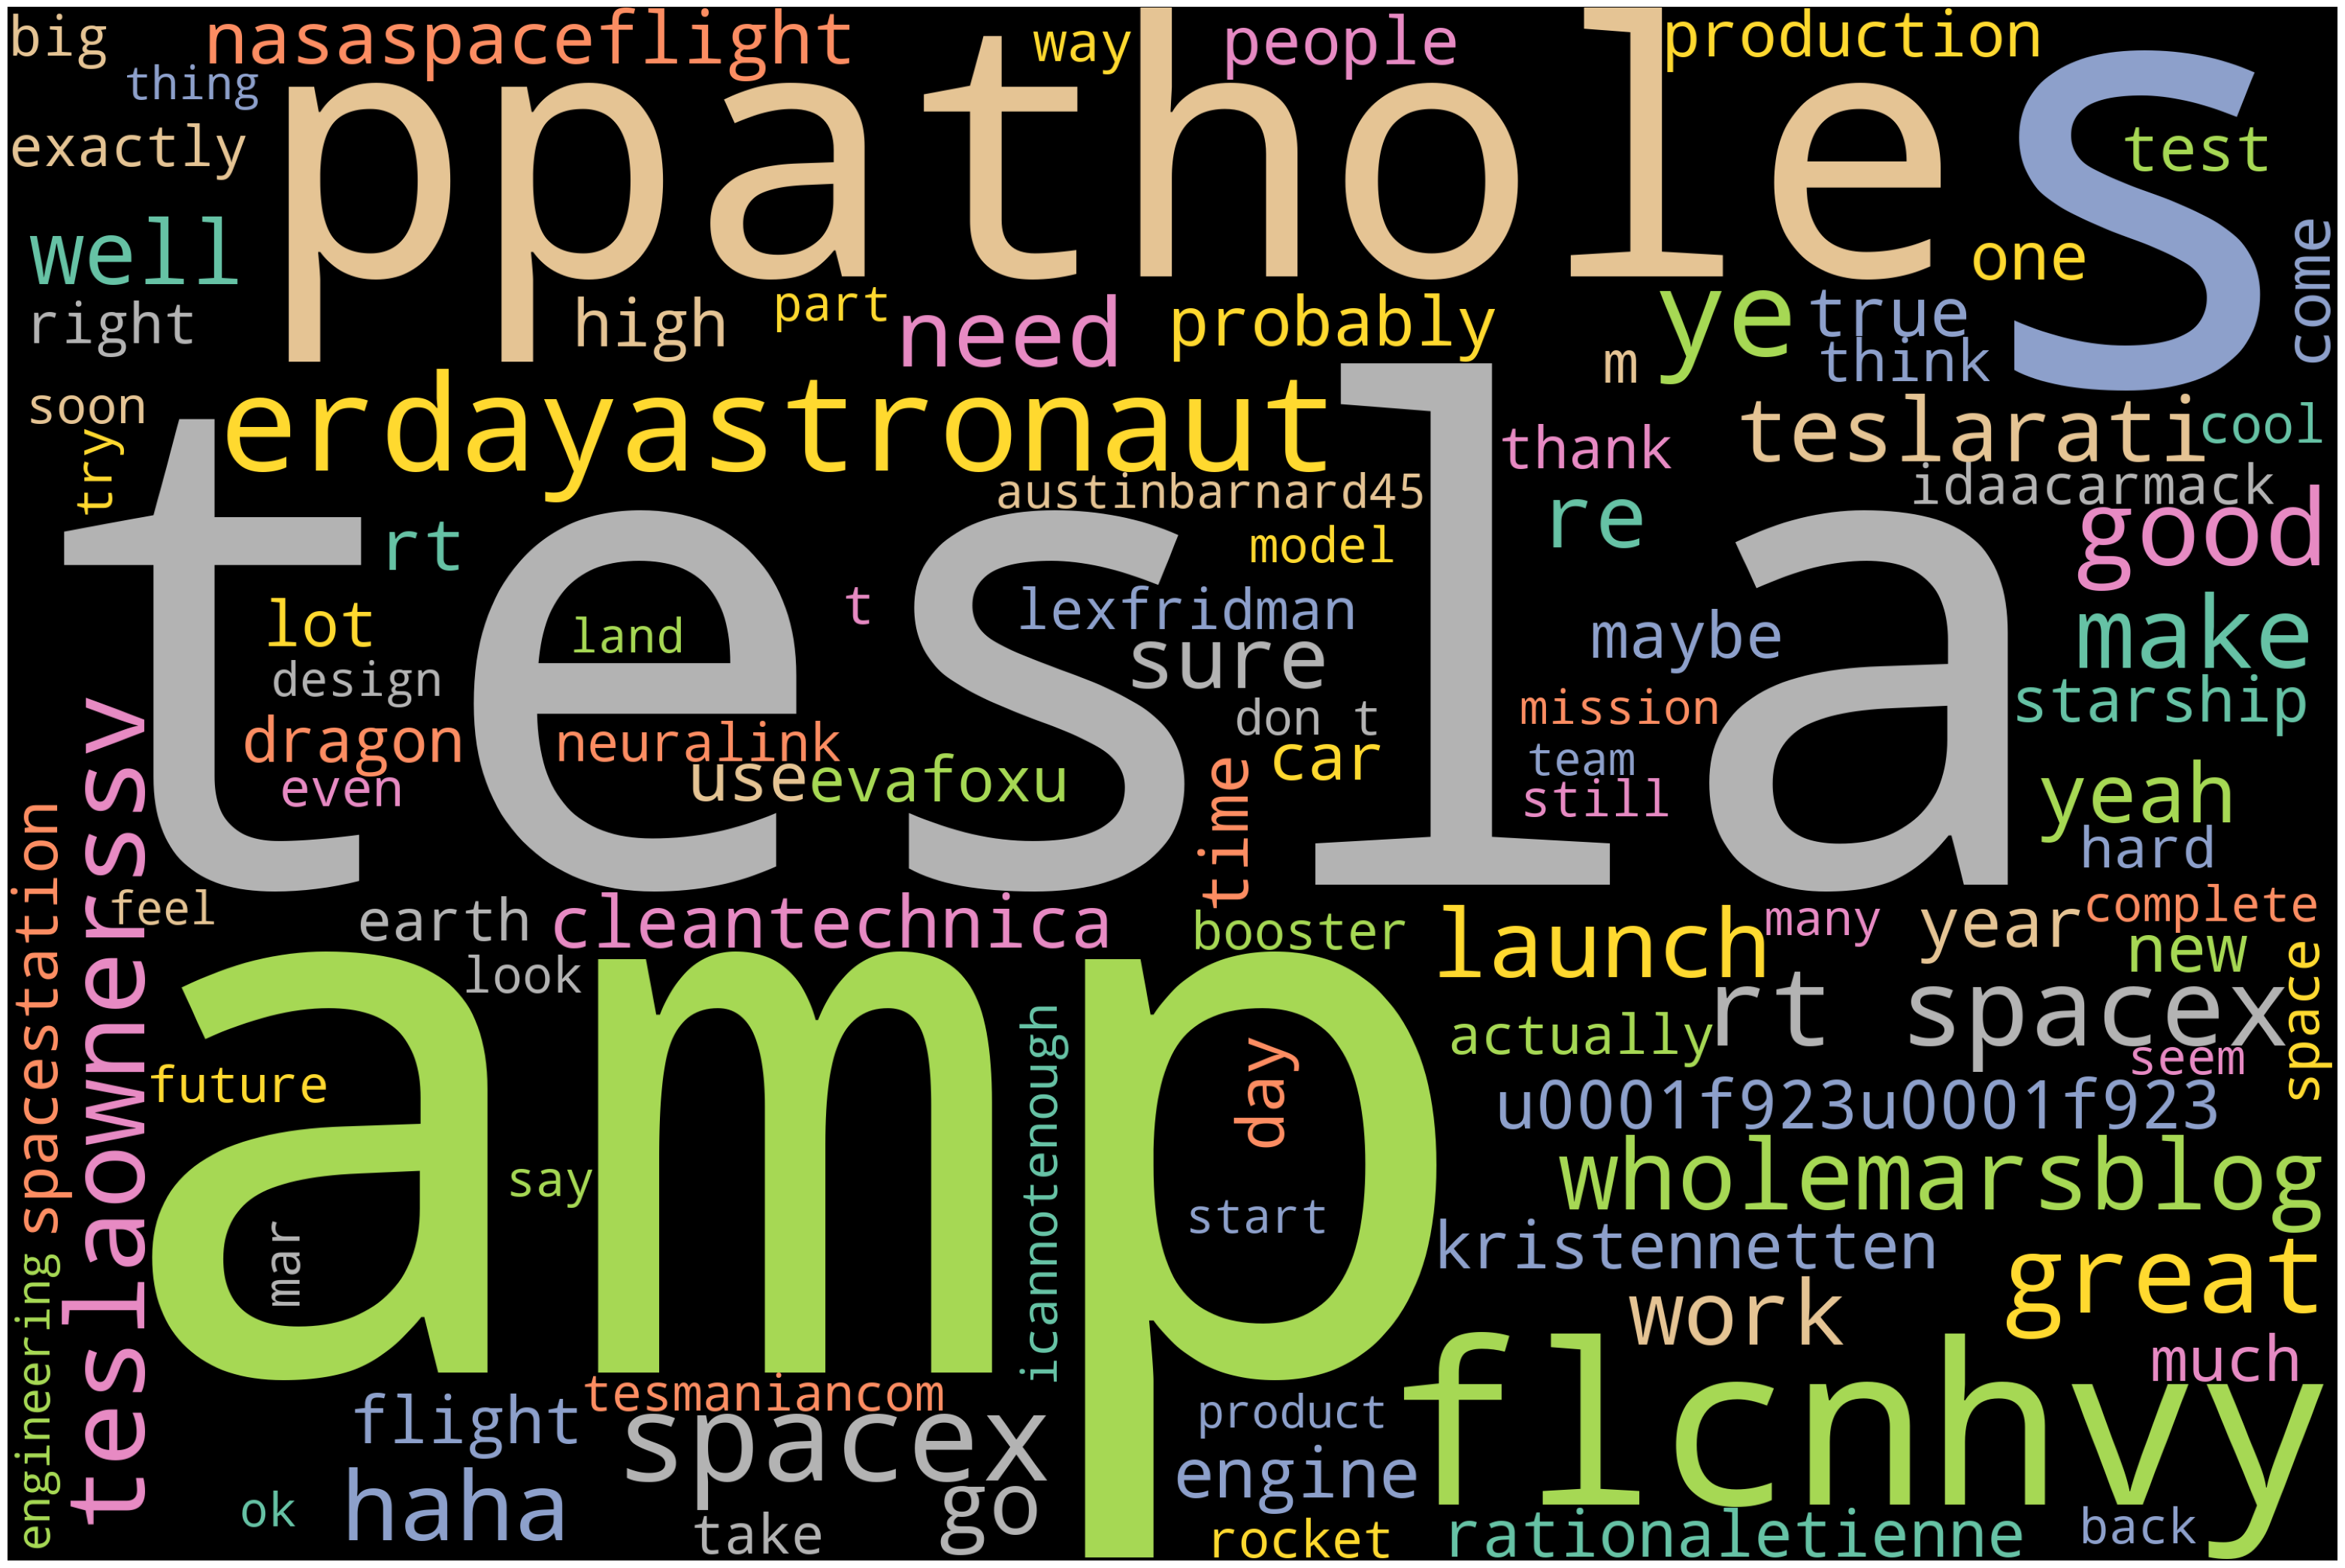

In [25]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
# Plot
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [26]:
##Part Of Speech Tagging

nlp = spacy.load("en_core_web_sm")
one_block =clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [27]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien PROPN
idaacarmack PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate ADJ
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge NOUN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse PROPN
kanyewest PROPN
geoffkeighley PROPN
unrealengine PROPN
its PROPN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PUNCT
toddler PROPN
hodler PROPN
joshmanmode PROPN
he PRON
definitely ADV
issue VERB
sentencin

In [28]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'fail', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'get', 'buy', 'dogecoin', 'lil', 'issue', 'sentencing', 'seem', 'bit', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'u0001f923u0001f923', 'power', 'haha', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'spacex', 'launch', 'element', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'starlink', 'endeavor', 'spacex', 'need', 'pass', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'adamklotz', 'mean', 'price', 'country', 'difference', 'tax', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intend', 'earth', 'idea', 'apply', 'team', 'manage', 'carbon', 'tesla', 'receive', 'stock', 'comp', 'stockoption', 'take', 'table', 'that\x92s', 'miss', 'work', 'go', 'seem', '

In [29]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

word  count
0             spacex    193
1              tesla    100
2     erdayastronaut     83
3               make     64
4             launch     62
...              ...    ...
2203          answer      1
2204        priority      1
2205      propaganda      1
2206           click      1
2207       teslagong      1

[2208 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

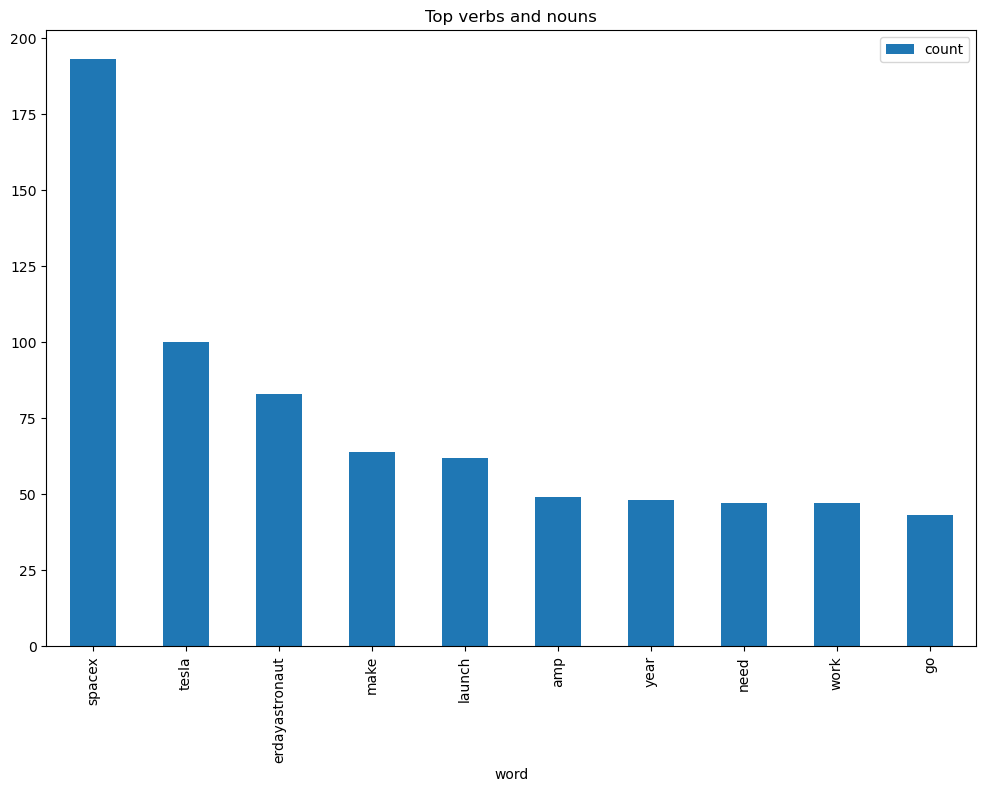

In [30]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## Emotion Mining - Sentiment Analysis

In [31]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(data))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [32]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [33]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [34]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [35]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [36]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [37]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [38]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [39]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
920  It may never pay out, as the stock cant b
 ht...               -4   
680  Occasional flights from land are ok, but frequ...               -4   
..                                                 ...              ...   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
647          60  
837          61  
64           11  
920          31  
680          39  
..          ...  
81           38  
585         138  
105          94  
36          231  
719          72  

[924 rows x 3 columns]

In [40]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [41]:
# negative Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[489 rows x 3 columns]

In [42]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
911                       He was one of the very best.                3   
913  @Ali_Afshari In general, we need to improve ho...                4   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                3   
917               This is both great &amp; terrifying.                3   
918  Everything weve ever sensed or thought has be...                2   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
911           7  
913          87  
915          15  
917           6  
918          17  

[435 rows x 3 columns]

In [43]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

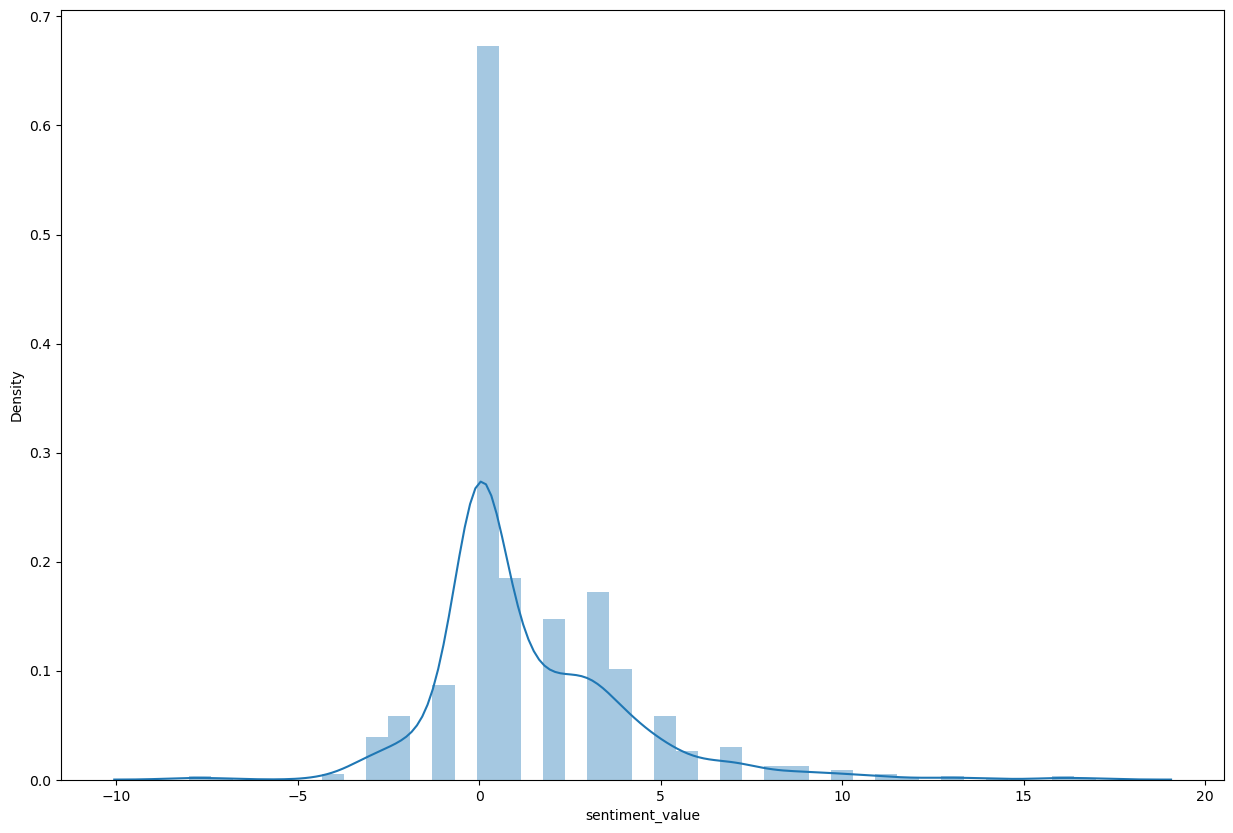

In [44]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

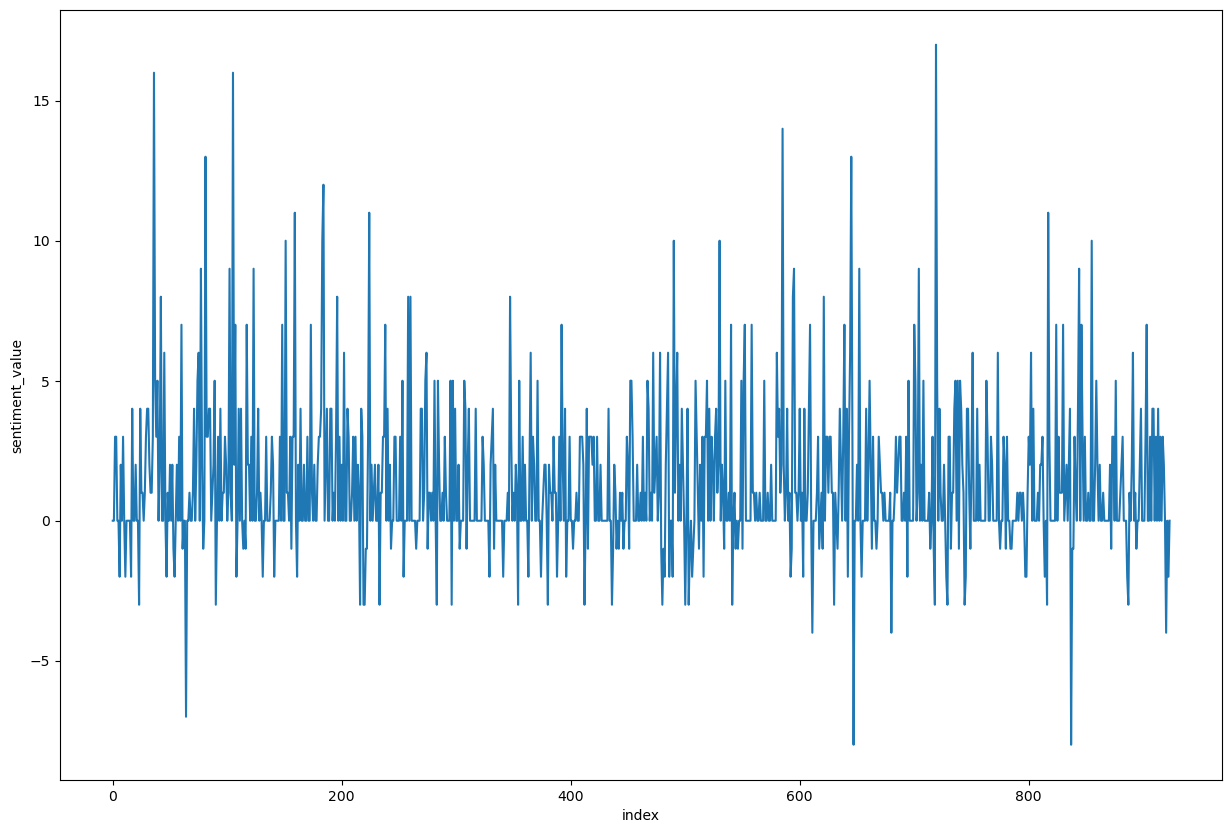

In [45]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)